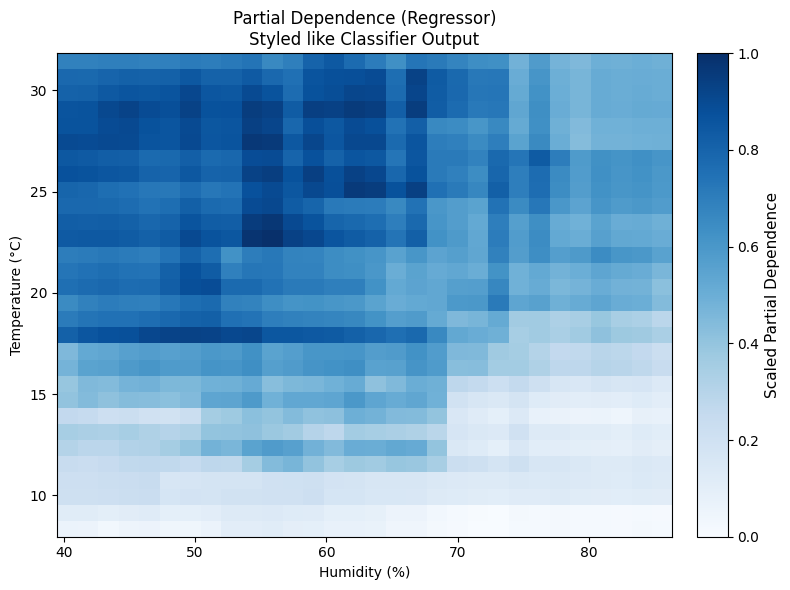

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Cargar datos y preparar
df = pd.read_csv("day.csv").sample(n=200, random_state=42)
df['temp'] = df['temp'] * 41
df['hum'] = df['hum'] * 100

features = ['temp', 'hum']
X = df[features]
y = df['cnt']

# Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener dependencia parcial 2D
pdp_results = partial_dependence(
    model,
    X,
    features=('temp', 'hum'), 
    grid_resolution=30
)
# Extraer datos
xx, yy = pdp_results["grid_values"]
Z = pdp_results["average"][0].reshape(len(xx), len(yy))
Z_scaled = (Z - Z.min()) / (Z.max() - Z.min())  # Escalar a [0,1] como si fuera probabilidad

# Crear gráfico estilo heatmap
fig, ax = plt.subplots(figsize=(8, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

im = ax.imshow(Z_scaled, origin='lower', aspect='auto',
               extent=[yy.min(), yy.max(), xx.min(), xx.max()],
               cmap='Blues')

# Barra de color
cbar = plt.colorbar(im, cax=cax)
cbar.set_label("Scaled Partial Dependence", fontsize=11)

# Etiquetas
ax.set_xlabel("Humidity (%)")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Partial Dependence (Regressor)\nStyled like Classifier Output")

plt.tight_layout()
plt.show()